Primero vamos a realizar unas operaciones sobre visualización de datos. Para ellos cargaremos el dataset de flores iris-setosa, y realizaremos visualizaciones sobre el dataset cargado.

In [1]:
import io
import pandas as pd
from sklearn.datasets import load_iris
#from google.colab import files

#Librerias para graficos
import matplotlib.pyplot as plt
import seaborn as sns

#Librerias para correlaciones
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr

import numpy as np


In [2]:
"""
# Cargamos archivo Iris
uploaded = files.upload()
iris = pd.read_csv(io.BytesIO(uploaded['Iris.csv']), sep=";")
"""

iris = pd.read_csv("data/Iris.csv", sep = ";")
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica
150,7.0,NaN,NaN,NaN,virginica


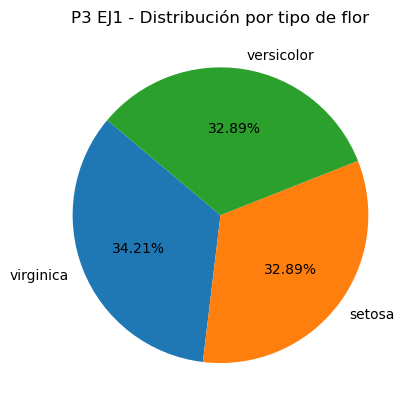

In [3]:
#Gráficos de Tarta
#Ejercicio 1: Realiza un grafico de tarta con las diferentes categorias del tipo de flor
#Además debe de aparecer en cada porcion de la tarta, el valor en porcentaje con 2 decimales
#Añadele el titulo "Distribución por tipo de flor"
#Utilizaremos la función pie de matplotlib https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

#Guarda la imagen en formato jpg con el nombre "P3_ejercicio1.jpg"

valores = iris['flower'].value_counts()

plt.pie(valores, labels=valores.index, autopct='%.2f%%', startangle=140)
plt.title('P3 EJ1 - Distribución por tipo de flor')
plt.savefig('P3_ejercicio1.jpg')

plt.show()

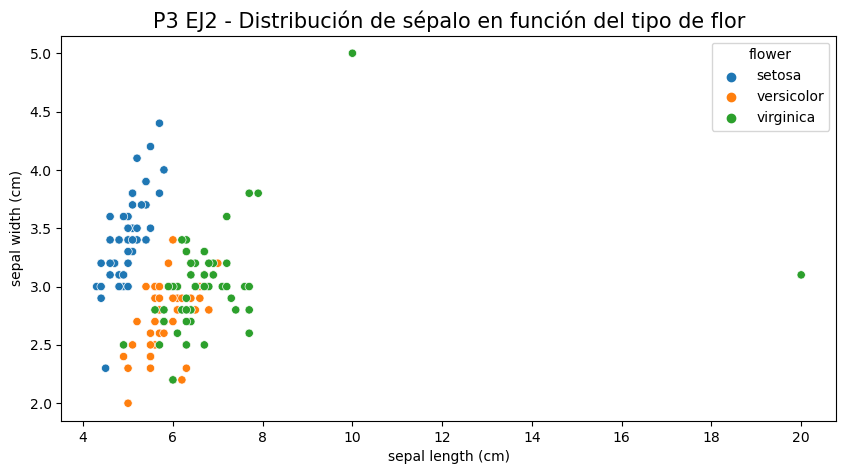

In [4]:
# Nubes de puntos
#Ejercicio 2 - Dibuja la nube de puntos para las columnas sepal length y sepal width. Pinta el punto segun el tipo de flor.
#Añadele al grafico el titulo "Distribución de sépalo en función del tipo de flor" y un tamaño de fuente de 15
#Establece un tamaño de figura 10x5
#Utiliza el metodo scatterplot de seaborn: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

#Guarda la imagen en formato jpg con el nombre "P3_ejercicio2.jpg"

plt.figure(figsize=(10, 5))
sns.scatterplot(data=iris, x='sepal length (cm)', y='sepal width (cm)', hue='flower')
plt.title('P3 EJ2 - Distribución de sépalo en función del tipo de flor', fontsize=15)
plt.savefig('P3_ejercicio2.jpg')

plt.show()

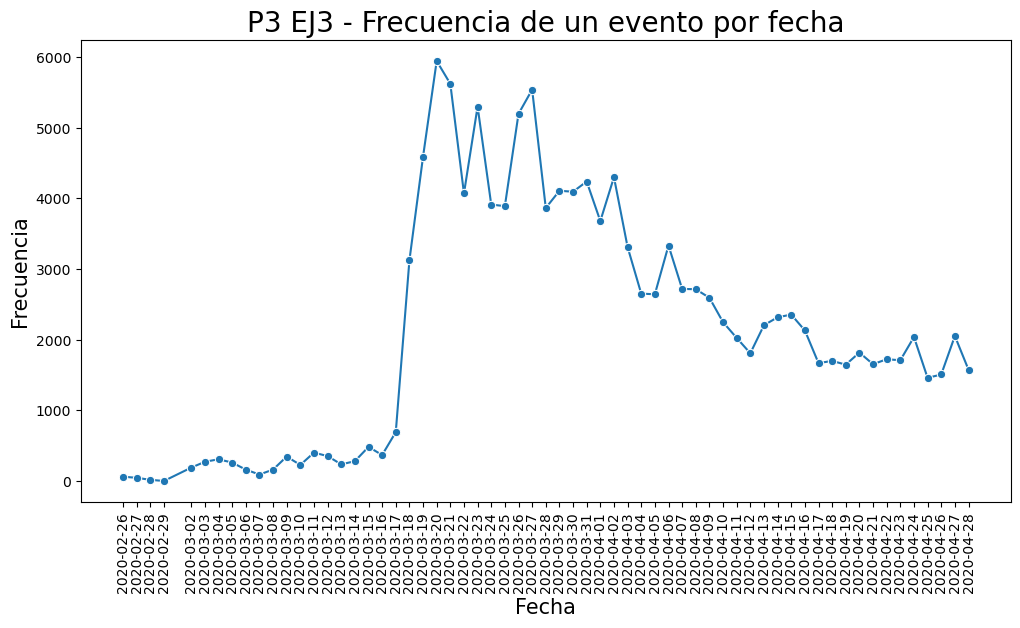

In [5]:
# Gráficos de líneas
#Para este ejercicio se proporciona un fichero con la columna "date_start" que fecha y hora de un evento especifico.
#Dibuja un lineplot que muestre las ocurrencias por fecha (debes de eliminar la hora de los datos)
#Ponle el titulo "Frecuencia de un evento por fecha" con un tamaño de fuente de 20
#Ponle al eje Y el titulo "Frecuencia" con un tamaño de fuente de 15
#Ponle al eje X el titulo "Fecha" con un tamaño de fuente de 15
#Haz que aparezcan todas las fechas del dataset en el eje X
#Nota: Usa el metodo lineplot de seaborn https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot
#Guarda la imagen en formato jpg con el nombre "P3_ejercicio3.jpg"

fechas = pd.read_csv("data/dates.csv", sep = ";")
fechas['date_start'] = fechas['date_start'].str.slice(0, 10)
fechas['date_start'] = pd.to_datetime(fechas['date_start'])

valores = fechas.groupby('date_start').size()

plt.figure(figsize=(12, 6))
grafico = sns.lineplot(data=valores.reset_index(), x='date_start', y=0, marker="o")

#Para mostrar todos los valores de fecha en el eje X
grafico.set(xticks=fechas['date_start'].drop_duplicates().values)
plt.xticks(rotation=90)

plt.title('P3 EJ3 - Frecuencia de un evento por fecha', fontsize=20)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)


plt.savefig('P3_ejercicio3.jpg')

plt.show()

C:\Users\estef\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


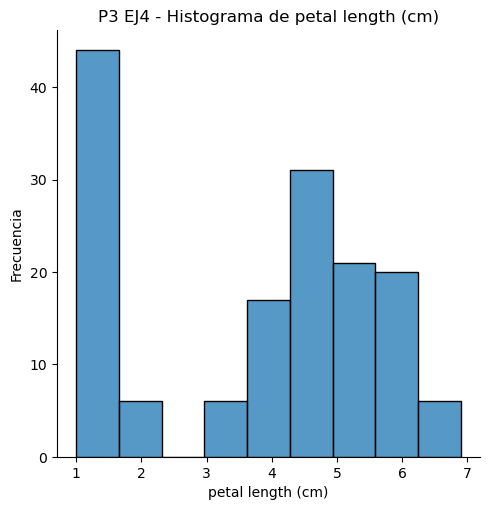

In [6]:
# Histogramas
# Calcula el histograma de la variable petal length
#Añadele el titulo "Histograma de petal length (cm)"
# Cambia el nombre del eje Y por "Frecuencia"
#Presta especial atención en lo que devuelve la clase displot(devuelve un FacetGrid)

#Guarda la imagen en formato jpg con el nombre "P3_ejercicio4.jpg"

histograma = sns.displot(data=iris, x='petal length (cm)')
histograma.set(title='P3 EJ4 - Histograma de petal length (cm)', ylabel='Frecuencia')
plt.savefig("P3_ejercicio4.jpg")

plt.show()

C:\Users\estef\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


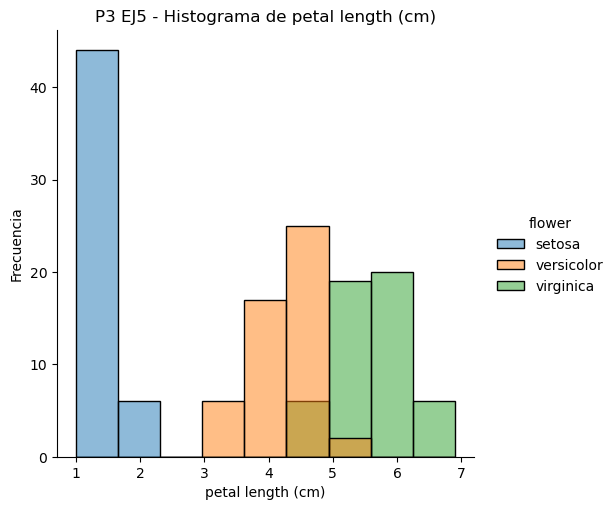

In [7]:
# Histogramas
# Calcula el histograma de la variable petal length
#Añadele el titulo "Histograma de petal length (cm)"
# Cambia el nombre del eje Y por "Frecuencia"
#Presta especial atención en lo que devuelve la clase displot(devuelve un FacetGrid)
# Representa en el mismo histograma segun el tipo de flor.
#Guarda la imagen en formato jpg con el nombre "P3_ejercicio5.jpg"

#Unicamente añadir hue al anterior
histograma = sns.displot(data=iris, x='petal length (cm)', hue='flower')
histograma.set(title='P3 EJ5 - Histograma de petal length (cm)', ylabel='Frecuencia')
plt.savefig("P3_ejercicio5.jpg")

plt.show()

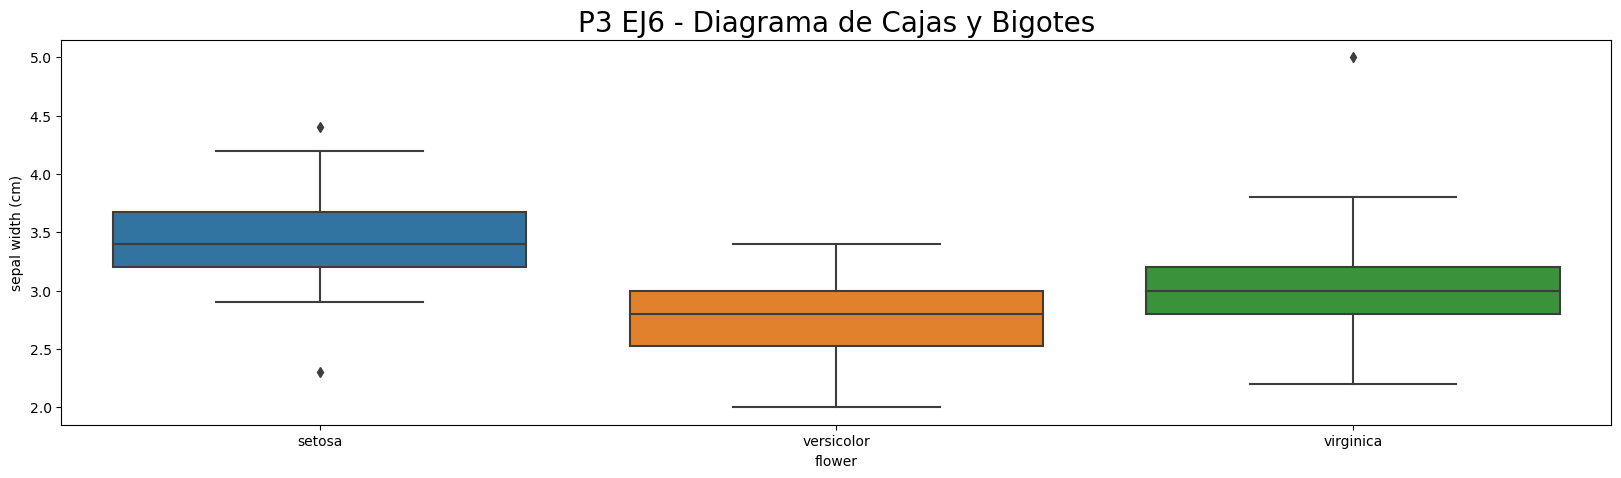

In [8]:
#Calcular el Diagrama de cajas y bigotes en función de la variable sepal_width con un tamaño de figura 20,5 y el titulo "Diagrama de cajas y bigotes"

#PISTA: ¿Nos interesa plotear los diagramas en función de alguna otra variable? Seria interesante utilizar el tipo de flor, para ver como
#se comporta la variable sepal width en función de la categoria. 

#¿Existe alguna diferencia entre las distribuciones segun el tipo de flor?
#Se puede apreciar como el tipo setosa tiene una anchura sepal mayor que los otros dos tipos.

#Creamos el diagrama de cajas y bigotes en función de la categoria
#Para eso usamos la funcion boxplot https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot
#Guarda la imagen en formato jpg con el nombre "P3_ejercicio6.jpg"

plt.figure(figsize=(20, 5)) 
sns.boxplot(data=iris, x='flower', y='sepal width (cm)')
plt.title('P3 EJ6 - Diagrama de Cajas y Bigotes', fontsize=20)

plt.savefig("P3_ejercicio6.jpg")

plt.show()

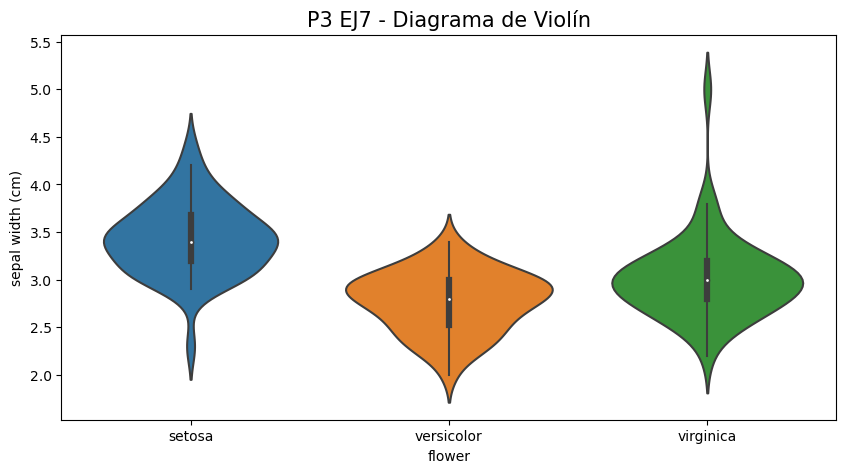

In [9]:
#Calcular el diagrama de violin para la misma variable, con un tamaño de figura 10x5 y el titulo "Diagrama de violin"

#¿Que diferencia veis en funcion del diagrama de bigotes? En realidad son practicamente iguales, solo que el diagrama de violin
# utiliza un Kernel density estimation(KDE) KDE en estadistica es una forma no paramétrica para estimar la función de densidad de probabilidad
#de una variable aleatoria. (muy relacionado con los rangos intercuartiles y un histograma)
#HAy que tener en cuenta, que este kernel se ve afectado por el numero de muestras, y para pocas muestras, la distribucion tendra mas ruido
#Ejemplo para 10 muestras, donde tenemos por ejemplo outliers saldra algo muy raro, pero cuanto mas muestras cojamos mas representativa será
#Guarda la imagen en formato jpg con el nombre "P3_ejercicio7.jpg"

plt.figure(figsize=(10, 5)) 
#sns.violinplot(data=iris, x='sepal width (cm)')
sns.violinplot(data=iris, x='flower', y='sepal width (cm)')
plt.title('P3 EJ7 - Diagrama de Violín', fontsize=15)

plt.savefig("P3_ejercicio7.jpg")

plt.show()

In [10]:
#Que Diferencias encuentras entre ambos graficos ? ¿Cual prefieres? Contesta a la pregunta en los comentarios del fichero .py a continuación del ejercicio anterior

#Los dos graficos muestran la distribucion de la variable sepal width, se diferencian en las siguientes cuestiones
"""
- El diagrama de cajas y bigotes muestra cada cuartil y el diagrama del violin no.
- El diagrama de cajas y bigotes muestra los valores atipicos, mientras que el diagrama del violin no.
- El diagrama del violin muestra la densidad de la variable, es decir podemos ver que anchura se repite mas y cual menos.
- En ambos se puede ver la mediana y los cuartiles, pero en el diagrama de violin es mas dificil de analizar, en el de cajas y bigotes se observa a simple vista.

En resumen, son gráficos muy parecidos, pero cada uno tiene carácteristicas extra según nuestros requerimientos.
"""

'\n- El diagrama de cajas y bigotes muestra cada cuartil y el diagrama del violin no.\n- El diagrama de cajas y bigotes muestra los valores atipicos, mientras que el diagrama del violin no.\n- El diagrama del violin muestra la densidad de la variable, es decir podemos ver que anchura se repite mas y cual menos.\n- En ambos se puede ver la mediana y los cuartiles, pero en el diagrama de violin es mas dificil de analizar, en el de cajas y bigotes se observa a simple vista.\n\nEn resumen, son gráficos muy parecidos, pero cada uno tiene carácteristicas extra según nuestros requerimientos.\n'

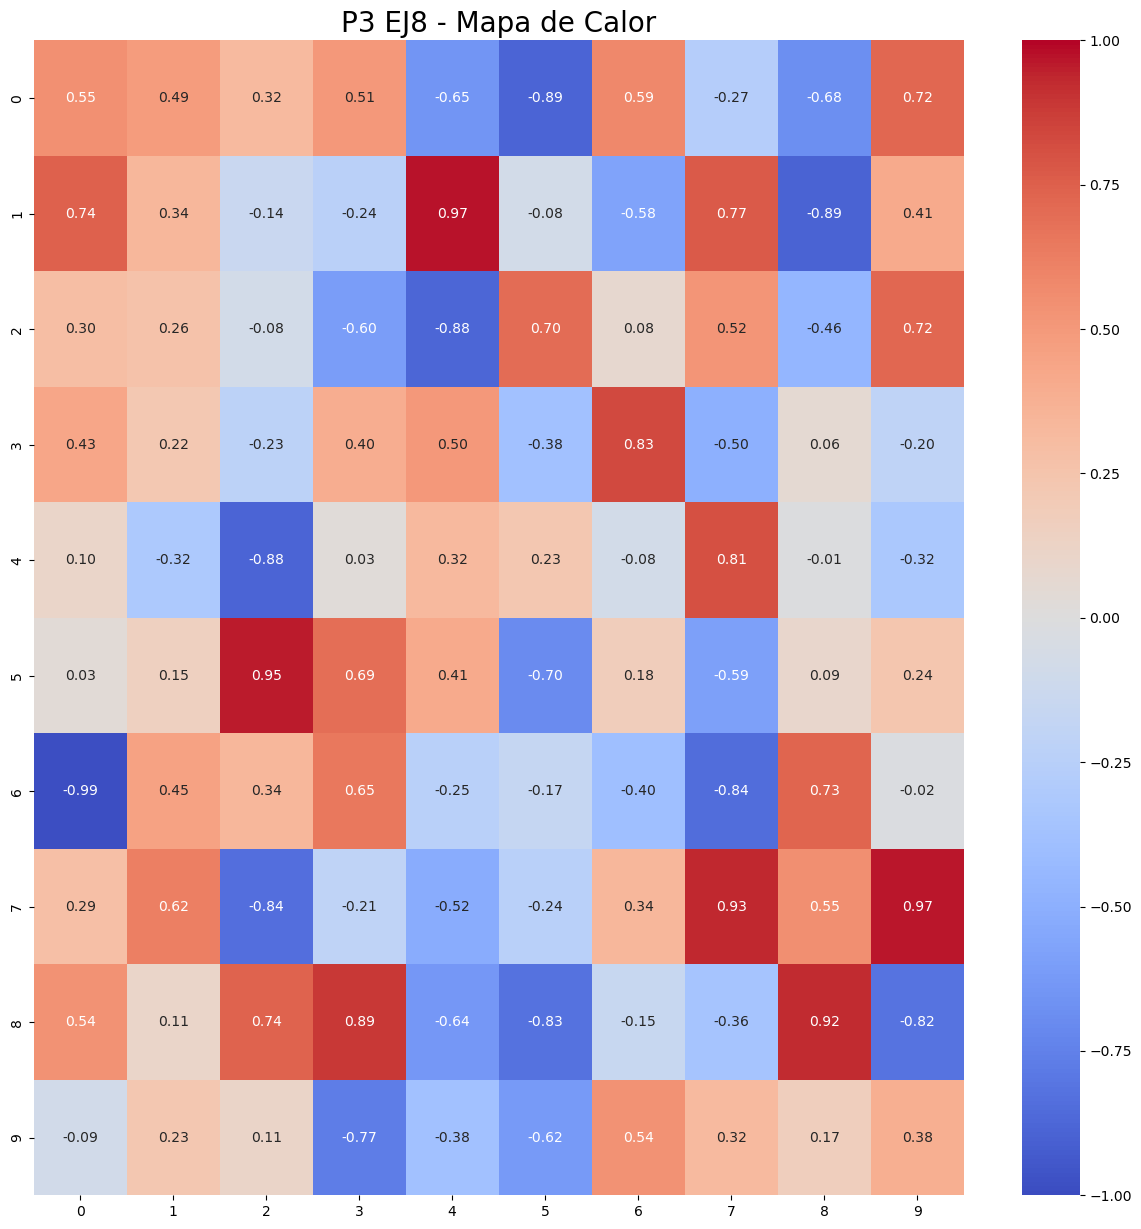

In [11]:
# En este ejercicio, vamos a dibujar un mapa de calor, para ello, crea primero una matriz 10x10 con valores aleatorios entre 0 y 1
#Establece un tamaño de figura 15x15
#Utiliza el mapa de colores "coolwarm"
#Establece el rango de colores entre los valores -1 y 1 ¿Qué observas al establecer este rango?
#Haz que aparezca en cada celda el valor ademas del color

#Guarda la imagen en formato jpg con el nombre "P3_ejercicio8.jpg"

matriz = np.random.uniform(-1, 1, (10, 10))
plt.figure(figsize=(15, 15))
sns.heatmap(matriz, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2f', cbar=True)

plt.title('P3 EJ8 - Mapa de Calor', fontsize=20)
plt.savefig("P3_ejercicio8.jpg")

plt.show()
